In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DKDData1E_1 = np.loadtxt("./DKD-1e-1.txt")
# DKDData1E_2 = np.loadtxt("./DKD-1e-2.txt")
# DKDData1E_3 = np.loadtxt("./DKD-1e-3.txt")
# DKDData5E_3 = np.loadtxt("./DKD-5e-3.txt")

In [3]:
def check12Law(Data=DKDData1E_1):
    Pos = Data[:, 1:4]
    # calculate the parameters of the elliptical orbits
    Distance = np.linalg.norm(Pos, axis=-1)
    Max = np.max(Distance)
    Min = np.min(Distance)
    a = (Max + Min) / 2
    c = (Max - Min) / 2  # know a, c and one of the focus (0, 0), we know everything
    DistanceFar = np.sqrt((Pos[:, 0]+2*c) * (Pos[:, 0]+2*c) + Pos[:, 1]*Pos[:, 1])
    # second law checking data
    CrossProduct = np.cross(Pos[:-1, :], Pos[1:, :])
    Area = np.linalg.norm(CrossProduct, axis=-1)

    return c, Area, Distance+DistanceFar


c1E_1, Area1E_1, TotalDistance1E_1 = check12Law(DKDData1E_1)
# c1E_2, Area1E_2, TotalDistance1E_2 = check12Law(DKDData1E_2)
# c5E_3, Area5E_3, TotalDistance5E_3 = check12Law(DKDData5E_3)
# c1E_3, Area1E_3, TotalDistance1E_3 = check12Law(DKDData1E_3)


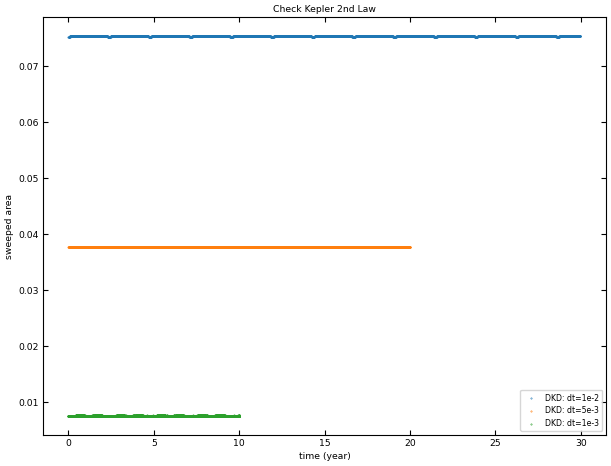

In [4]:
# second law checking
plt.scatter(DKDData1E_2[:-1, 0], Area1E_2, s=.2, label="DKD: dt=1e-2")
plt.scatter(DKDData5E_3[:-1, 0], Area5E_3, s=.2, label="DKD: dt=5e-3")
plt.scatter(DKDData1E_3[:-1, 0], Area1E_3, s=.2, label="DKD: dt=1e-3")

plt.title("Check Kepler 2nd Law")
plt.xlabel("time (year)")
plt.ylabel("sweeped area")
plt.legend()
# plt.savefig("second-law-checking.png", dpi=300)
plt.show()


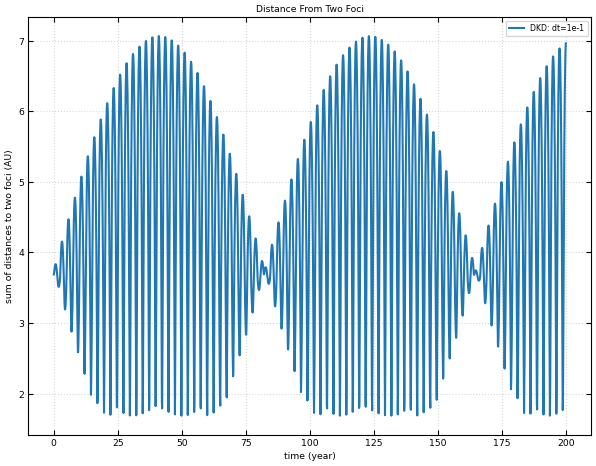

In [16]:
# first law checking
plt.plot(DKDData1E_1[:2000, 0], TotalDistance1E_1[:2000] , label="DKD: dt=1e-1")
# plt.scatter(DKDData1E_2[:, 0], TotalDistance1E_2 ,s=.1, label="DKD: dt=1e-2")
# plt.scatter(DKDData5E_3[:, 0], TotalDistance5E_3, s=.1, label="DKD: dt=5e-3")
# plt.scatter(DKDData1E_3[:, 0], TotalDistance1E_3, s=.1, label="DKD: dt=1e-3")
plt.grid()
plt.title("Distance From Two Foci")
plt.xlabel("time (year)")
plt.ylabel("sum of distances to two foci (AU)")
plt.legend()
plt.savefig("first-law-checking-2.png", dpi=300)
plt.show()


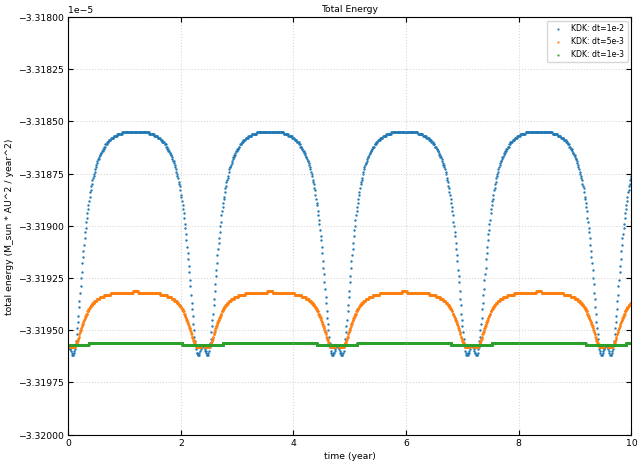

In [6]:
# energy plot
plt.scatter(DKDData1E_2[:, 0], DKDData1E_2[:, -1], s=.5, alpha=1, label="KDK: dt=1e-2")
plt.scatter(DKDData5E_3[:, 0], DKDData5E_3[:, -1], s=.5, alpha=1, label="KDK: dt=5e-3")
plt.scatter(DKDData1E_3[:, 0], DKDData1E_3[:, -1], s=.5, alpha=1, label="KDK: dt=1e-3")

plt.xlim(0, 10)
plt.ylim(-3.320e-5, -3.318e-5)
plt.title("Total Energy")
plt.xlabel("time (year)")
plt.ylabel("total energy (M_sun * AU^2 / year^2)")
plt.legend()
plt.grid()
# plt.savefig("total-energy.png", dpi=300)
plt.show()


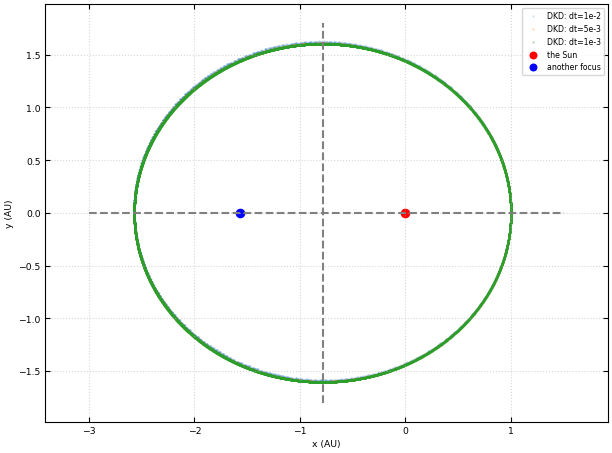

In [8]:
# orbit plot
plt.scatter(DKDData1E_2[:, 1], DKDData1E_2[:, 2], s=.1, alpha=.5, label="DKD: dt=1e-2")
plt.scatter(DKDData5E_3[:, 1], DKDData5E_3[:, 2], s=.2, alpha=.5, label="DKD: dt=5e-3")
plt.scatter(DKDData1E_3[:, 1], DKDData1E_3[:, 2], s=.3, alpha=.5, label="DKD: dt=1e-3")
plt.axis('equal')
plt.scatter(0, 0, s=35, c='r', label="the Sun")
plt.scatter(-2*c1E_3, 0, s=35, c='b', label="another focus")
plt.hlines(0, -3, 1.5, ls='--', color="grey")
plt.vlines(-c1E_3, -1.8, 1.8, ls='--', colors="grey")

plt.ylabel('y (AU)')
plt.xlabel('x (AU)')
plt.legend()
plt.grid()
# plt.savefig("orbits.png", dpi=300)
plt.show()
